**Problem Definition**

The goal of this project is to predict the average fare amount spent on taxi rides for each region of New York City, based on specific time periods such as given days and hours. This is a supervised regression problem, where the task is to estimate a continuous target variable (taxi fare) using historical data that includes actual fare amounts as labels.

The problem can be broken down into the following aspects:

**Supervised Learning:** The dataset contains labeled data, where the target variable (fare amount) is known for each taxi ride. The model learns from these historical data points to make future predictions.

**Regression Task:** Since the value we aim to predict is continuous (taxi fare amounts), this problem falls under regression. The model needs to predict a numerical outcome rather than a categorical class.
By building an accurate predictive model, we can understand the relationships between various factors such as pickup location, dropoff location, day of the week, hour of the day, and how these factors influence the average taxi fare. This insight can be useful for city planning, optimizing taxi fleet management, and providing valuable predictions for potential fare costs in specific regions at particular times.

The challenge is to handle the complexity and variability in the data, such as time-based patterns, spatial variations across different regions, and other contextual factors that may influence taxi fare pricing.

# **1. Import Libraries**

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# **2. Import Dataset**

In [4]:
# Loading the taxi dataset from a Parquet file into a pandas DataFrame
taxi_df = pd.read_parquet("yellow_tripdata_2019-01.parquet")

In [5]:
# Printing the shape (number of rows and columns) of the DataFrame
print(taxi_df.shape)

# Displaying the first few rows of the taxi DataFrame to inspect the data
taxi_df.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


# **3. Data Exploration**

In [6]:
# Displaying the column names of the taxi DataFrame
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [7]:
# Selecting specific columns from the taxi DataFrame for analysis
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [8]:
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


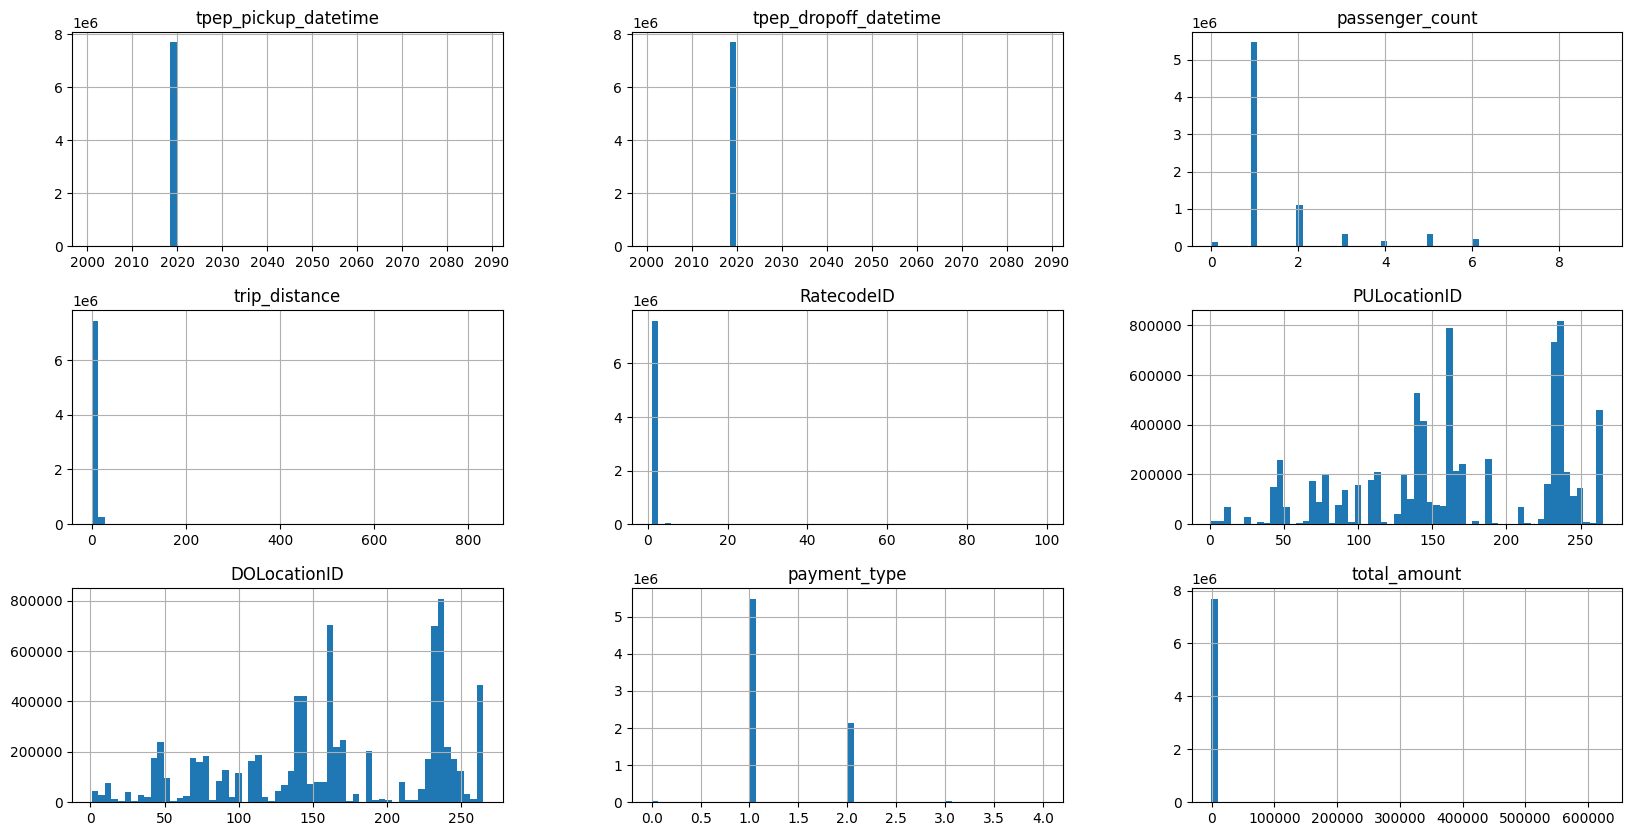

In [9]:
# Plotting histograms for all numerical columns in the taxi DataFrame
# The figure size is set to 20x10, and each histogram has 60 bins
taxi_df.hist(figsize=(20,10), bins=60)
plt.show()

In [10]:
# Displaying the count of unique values in the 'RatecodeID' column
taxi_df['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,7430288
2.0,166093
5.0,54570
3.0,11801
4.0,4895
99.0,252
6.0,46


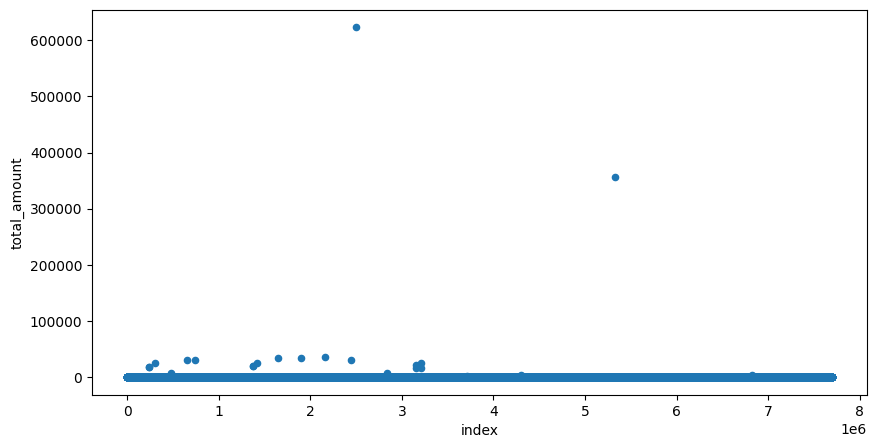

In [11]:
# Resetting the index of the DataFrame and creating a scatter plot
# The x-axis represents the index and the y-axis represents the 'total_amount'
# The figure size is set to 10x5
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

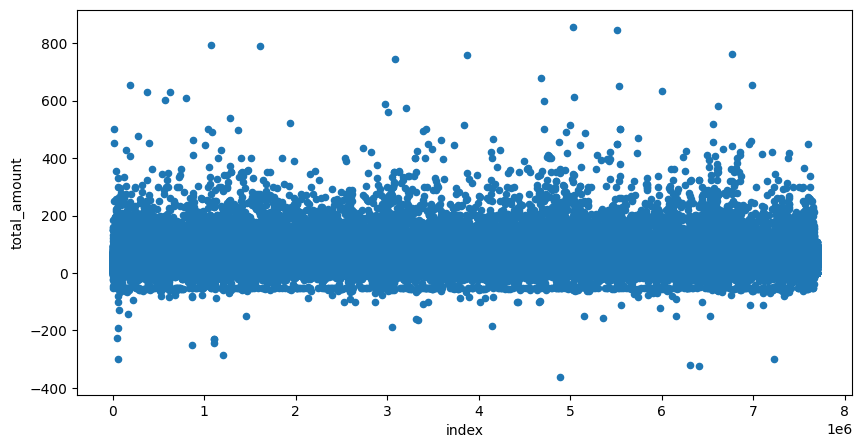

In [12]:
# Filtering the DataFrame to include only rows where 'total_amount' is less than 1000
# Resetting the index and creating a scatter plot
# The x-axis represents the index and the y-axis represents the 'total_amount'
# The figure size is set to 10x5
taxi_df[taxi_df['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

(7127, 9)


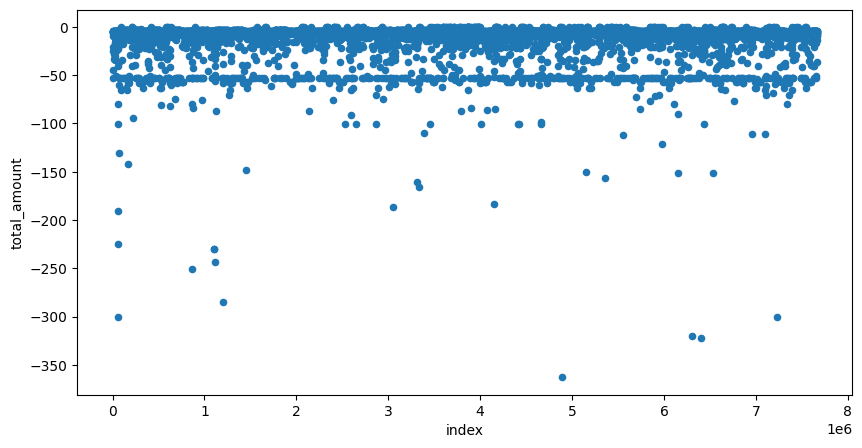

In [13]:
# Printing the shape (number of rows and columns) of the DataFrame where 'total_amount' is less than 0
print(taxi_df[taxi_df['total_amount']<0].shape)

# Filtering the DataFrame to include only rows where 'total_amount' is less than 0
# Resetting the index and creating a scatter plot
# The x-axis represents the index and the y-axis represents the 'total_amount'
# The figure size is set to 10x5
taxi_df[taxi_df['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

In [14]:
# Displaying the first few rows of the DataFrame where 'total_amount' is less than 0
taxi_df[taxi_df['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


**Note:** Two things to deal with --> Negative values and very high values. Let's first look at negative values.

In [15]:
# Displaying the count of each unique 'payment_type' for rows where 'total_amount' is less than 0
taxi_df[taxi_df['total_amount']<0]['payment_type'].value_counts()

,count
payment_type,
3,4083
4,2667
2,376
1,1


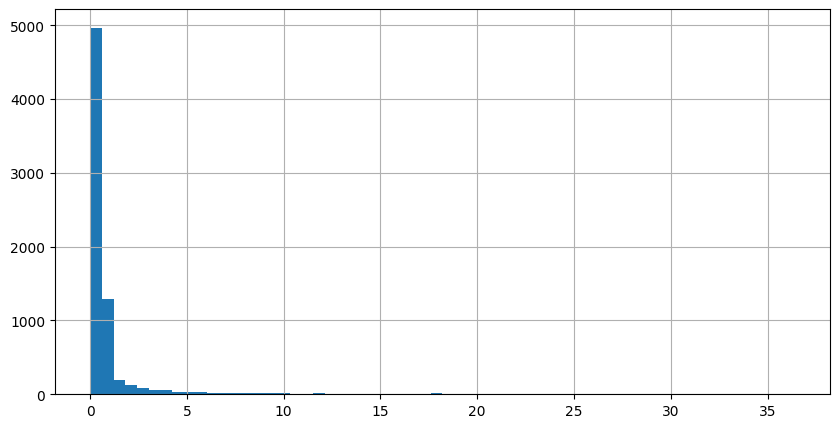

In [16]:
# Creating a histogram for the 'trip_distance' column where 'total_amount' is less than 0
# The histogram has 60 bins and the figure size is set to 10x5
taxi_df[taxi_df['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))
plt.show()

In [17]:
# Printing the shape (number of rows and columns) of the DataFrame where 'total_amount' is equal to 0
print(taxi_df[taxi_df['total_amount'] == 0].shape)

# Displaying the first few rows of the DataFrame where 'total_amount' is equal to 0
taxi_df[taxi_df['total_amount'] == 0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [18]:
# Displaying the count of each unique 'payment_type' for rows where 'total_amount' is equal to 0
taxi_df[taxi_df['total_amount'] == 0]['payment_type'].value_counts()

,count
payment_type,
1,813
2,569
0,231
3,29
4,1


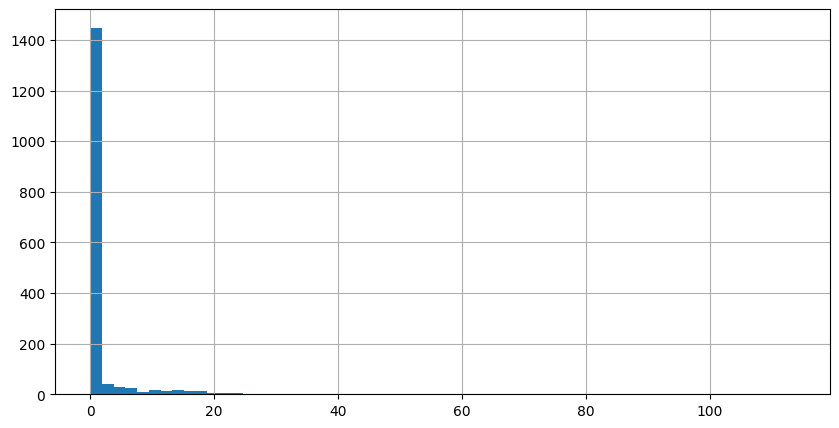

In [19]:
# Creating a histogram for the 'trip_distance' column where 'total_amount' is equal to 0
# The histogram has 60 bins and the figure size is set to 10x5
taxi_df[taxi_df['total_amount'] == 0]['trip_distance'].hist(bins=60, figsize=(10,5))
plt.show()

In [20]:
# Displaying the count of each unique 'trip_distance' value for rows where 'total_amount' is equal to 0
taxi_df[taxi_df['total_amount'] == 0]['trip_distance'].value_counts()

,count
trip_distance,
0.00,1323
0.03,9
0.01,8
0.06,6
1.00,4
...,...
11.86,1
4.59,1
20.92,1


**Note:** We can safely get rid of the negative values. What about the very high values?

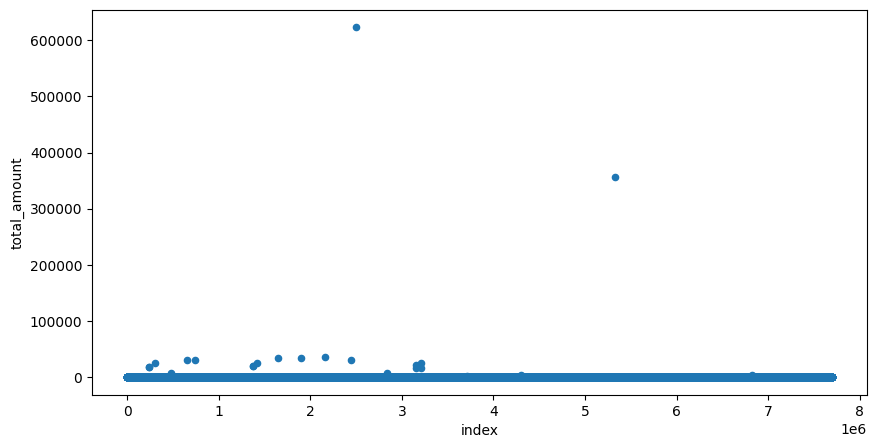

In [21]:
# Resetting the index of the DataFrame and creating a scatter plot
# The x-axis represents the index and the y-axis represents the 'total_amount'
# The figure size is set to 10x5
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

In [22]:
# Displaying the shape (number of rows and columns) of the DataFrame where 'total_amount' is greater than 200
taxi_df[taxi_df['total_amount'] > 200].shape

(1166, 9)

In [23]:
# Calculating and displaying the mean (average) value of the 'total_amount' column
taxi_df['total_amount'].mean()

15.810651344610214

**Note:** We can agree to cut from $200 level.

# **4. Data Cleaning**

In [24]:
# Filtering the DataFrame to include only rows where 'total_amount' is between 0 (inclusive) and 200 (exclusive)
# Storing the filtered data in a new DataFrame called 'taxi_data_filtered'
taxi_data_filtered = taxi_df[(taxi_df['total_amount'] >= 0) & (taxi_df['total_amount'] < 200)]

In [25]:
# Printing the shape (number of rows and columns) of the original taxi_df DataFrame
print(taxi_df.shape)

# Displaying the shape (number of rows and columns) of the filtered DataFrame 'taxi_data_filtered'
taxi_data_filtered.shape


(7696617, 9)


(7688319, 9)

In [26]:
# Calculating and displaying the number of missing values (NaN) in each column of the filtered DataFrame 'taxi_data_filtered'
taxi_data_filtered.isna().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,28672
trip_distance,0
RatecodeID,28672
PULocationID,0
DOLocationID,0
payment_type,0
total_amount,0


In [27]:
# Filtering the DataFrame 'taxi_data_filtered' to include only rows that have missing values in any column
# Storing these rows in a new DataFrame called 'missing_data_rows' and printing them
missing_data_rows = taxi_data_filtered[taxi_data_filtered.isna().any(axis=1)]
print(missing_data_rows)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7667945  2019-01-01 00:38:45   2019-01-01 00:54:11              NaN   
7667946  2019-01-01 01:56:58   2019-01-01 02:13:14              NaN   
7667947  2019-01-01 01:59:06   2019-01-01 02:20:24              NaN   
7667948  2019-01-01 02:34:00   2019-01-01 02:34:00              NaN   
7667949  2019-01-01 02:44:00   2019-01-01 03:03:00              NaN   
...                      ...                   ...              ...   
7696612  2019-01-31 23:37:20   2019-02-01 00:10:43              NaN   
7696613  2019-01-31 23:28:00   2019-01-31 23:50:50              NaN   
7696614  2019-01-31 23:11:00   2019-01-31 23:46:00              NaN   
7696615  2019-01-31 23:03:00   2019-01-31 23:14:00              NaN   
7696616  2019-01-31 23:41:03   2019-02-01 00:19:16              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
7667945           2.21         NaN           161           263     

In [28]:
# Calculating the percentage of missing data based on the total number of rows and missing values
# Printing the missing data percentage
missing_percentage = (28672 / 7696617) * 100
print(f"Missing data percentage: {missing_percentage}%")

Missing data percentage: 0.37252730647763815%


In [29]:
# Dropping all rows with missing values from the 'taxi_data_filtered' DataFrame
# The filtered DataFrame without missing values is saved back into 'taxi_data_filtered'
taxi_data_filtered = taxi_data_filtered.dropna()

In [30]:
# Checking and displaying the number of missing values in each column of the 'taxi_data_filtered' DataFrame after dropping missing values
taxi_data_filtered.isna().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
total_amount,0


# **5. Data Preparation**

In [31]:
# Creating a copy of the 'taxi_data_filtered' DataFrame and saving it as 'taxi_data_prepared' for further processing
taxi_data_prepared = taxi_data_filtered.copy()

In [32]:
# Displaying the data types of each column in the 'taxi_data_prepared' DataFrame
taxi_data_prepared.dtypes

,0
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
PULocationID,int64
DOLocationID,int64
payment_type,int64
total_amount,float64


In [33]:
# Converting the 'RatecodeID', 'PULocationID', 'DOLocationID', and 'payment_type' columns to string data type
taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [34]:
# Displaying the data types of each column in the 'taxi_data_prepared' DataFrame after the type conversion
taxi_data_prepared.dtypes

,0
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,object
PULocationID,object
DOLocationID,object
payment_type,object
total_amount,float64


In [35]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


In [36]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
# We make it datetime again because it's very little use when it's just a string (can't compare, sort, etc.)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] =  taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [37]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55,2018-11-28,2018,11,28,15


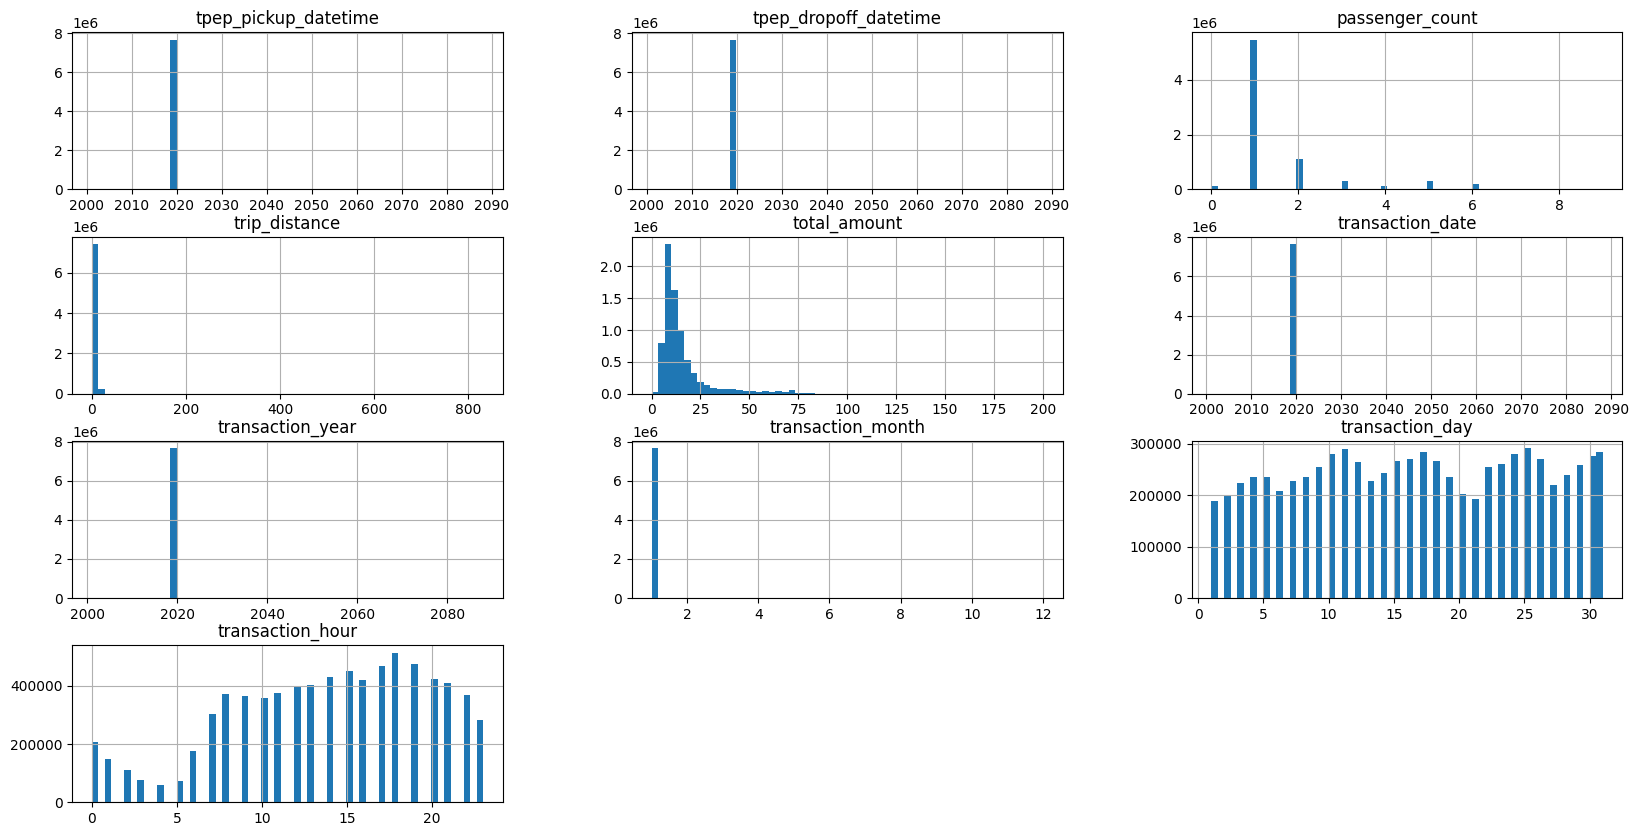

In [38]:
# Plotting histograms for all numerical columns in the 'taxi_data_prepared' DataFrame
# The figure size is set to 20x10, and each histogram has 60 bins
taxi_data_prepared.hist(figsize=(20,10), bins=60)
plt.show()

In [39]:
# Filtering the DataFrame to include only rows where 'transaction_year' is 2019
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year'] == 2019]

# Further filtering the DataFrame to include only rows where 'transaction_month' is January (1)
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month'] == 1]

In [40]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [41]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7659111, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


**Note:** Now is a good time to think about what we want to predict. Depending on this, we need to transform our data to have a certain format.

In [42]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102496, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


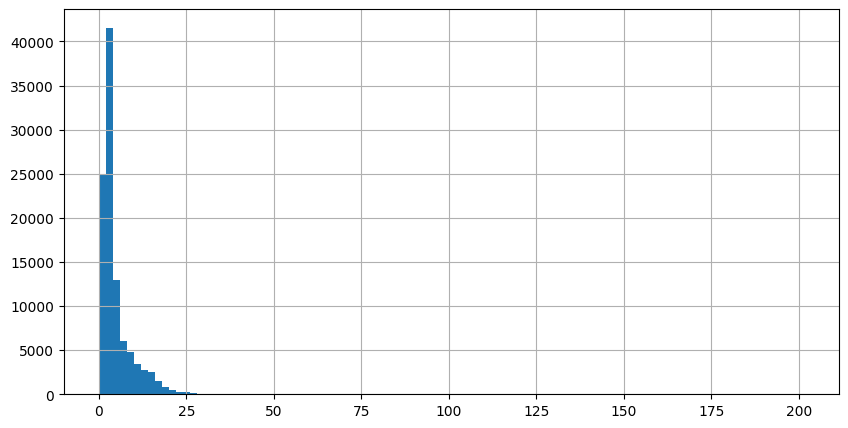

In [43]:
# Plotting a histogram for the 'trip_distance' column in the 'taxi_grouped_by_region' DataFrame
# The histogram has 100 bins, and the figure size is set to 10x5
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))
plt.show()

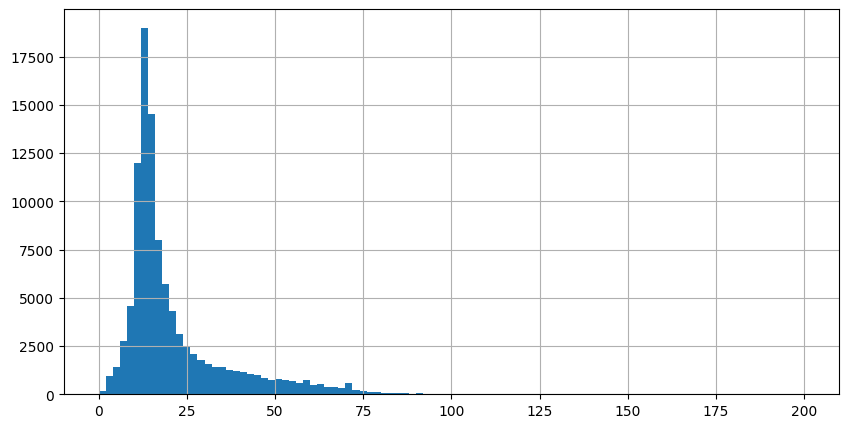

In [44]:
# Plotting a histogram for the 'total_amount' column in the 'taxi_grouped_by_region' DataFrame
# The histogram has 100 bins, and the figure size is set to 10x5
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))
plt.show()

# 6. **Benchmark Model**

In [45]:
# Creating a copy of the 'taxi_grouped_by_region' DataFrame and saving it as 'data_for_benchmark_model' for further processing
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [46]:
data_for_benchmark_model.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [47]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'

In [48]:
# Importing the train_test_split function from scikit-learn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# One-hot encoding
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

## **6.1 Model Evaluation**

In [50]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 3.3901567000270942
mean_squared_error 65.59165591087196
root_mean_squared_error 8.098867569658857
r2 0.7663533944647504


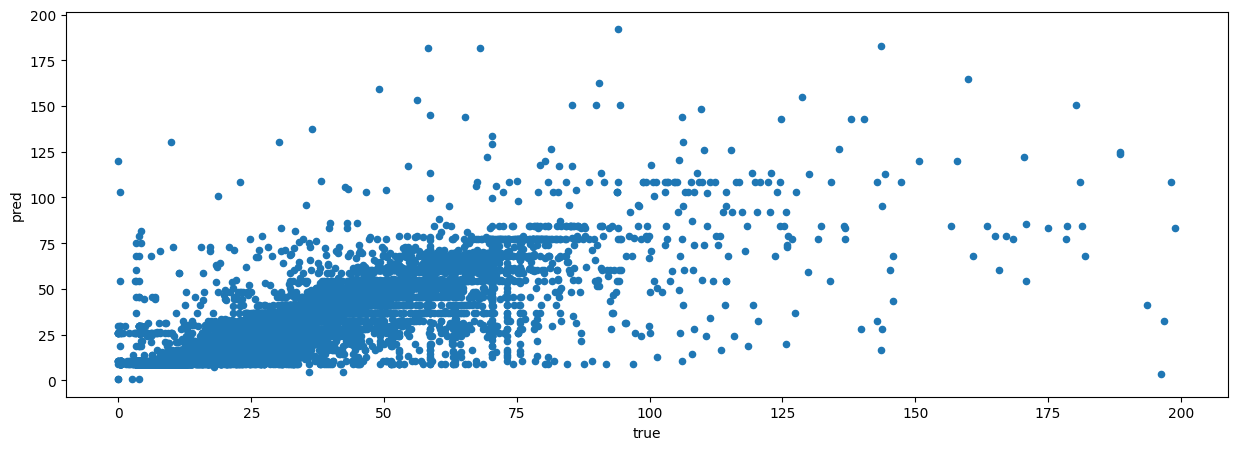

In [51]:
# Creating a DataFrame with actual values ('true') and predicted values ('pred') for comparison
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between actual and predicted values
# The figure size is set to 15x5, with 'true' values on the x-axis and 'pred' values on the y-axis
results.plot(figsize=(15,5), kind='scatter', x='true', y='pred')
plt.show()


## **6.1 Fixing Problems**

In [52]:
# Defining categorical features and target for the benchmark model
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

# Selecting input features (X_bench) and target feature (y_bench) from the benchmark dataset
X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# One-hot encoding the categorical features to prepare them for the model
X_bench = pd.get_dummies(X_bench)

# Splitting the dataset into training (X_train_b, y_train_b) and testing (X_test_b, y_test_b) sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor

# Initializing and training a Decision Tree Regressor model with a max depth of 10
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

# Predicting values for the test set
y_pred_b = model_at_hand.predict(X_test_b)

# Importing metrics for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Evaluating the model using different error metrics and printing the results
print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))  # Mean Absolute Error (MAE)
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))    # Mean Squared Error (MSE)
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))  # Root Mean Squared Error (RMSE)
print('r2', r2_score(y_test_b, y_pred_b))  # R-squared (R²) score to evaluate model fit


mean_absolute_error 9.790905419519584
mean_squared_error 220.40974506250367
root_mean_squared_error 14.84620305204343
r2 0.21486981772924219


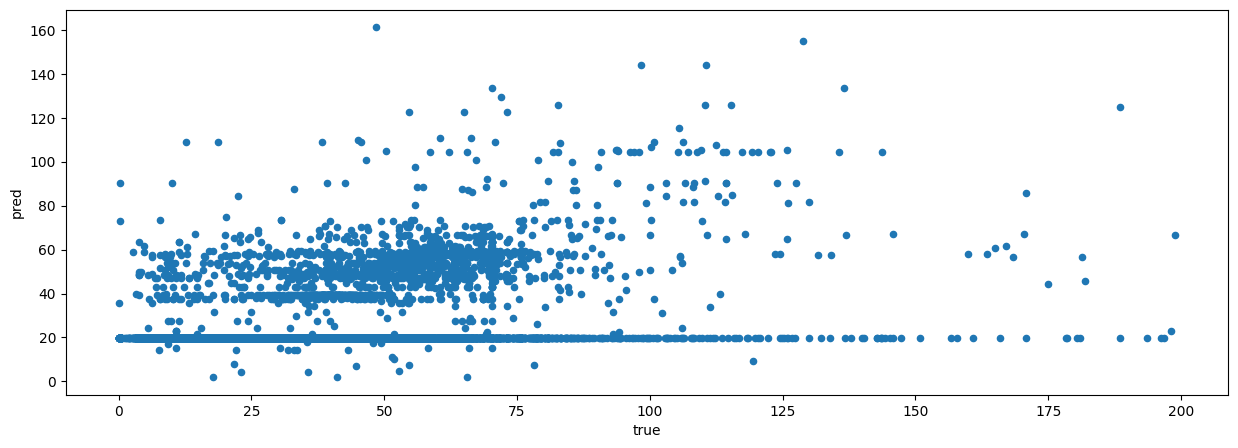

In [53]:
# Creating a DataFrame with actual values ('true') and predicted values ('pred') for comparison
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between actual and predicted values
# The figure size is set to 15x5, with 'true' values on the x-axis and 'pred' values on the y-axis
results.plot(figsize=(15,5), kind='scatter', x='true', y='pred')
plt.show()


# **7. Feature Engineering**

In [54]:
# Displaying the first few rows of the 'taxi_grouped_by_region' DataFrame to inspect the grouped data
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [55]:
# Creating a copy of the 'taxi_grouped_by_region' DataFrame and saving it as 'data_with_new_features' for further feature engineering
data_with_new_features = taxi_grouped_by_region.copy()

In [56]:
# Extracting the day of the week (0=Monday, 6=Sunday) from the 'transaction_date' column and saving it as 'transaction_week_day'
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday

# Creating a new 'weekend' column that indicates whether the transaction occurred on a weekend (Saturday=5, Sunday=6)
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [57]:
# Importing the USFederalHolidayCalendar from pandas to identify US federal holidays
from pandas.tseries.holiday import USFederalHolidayCalendar

# Initializing the US Federal Holiday Calendar
cal = USFederalHolidayCalendar()

# Getting the list of holidays between the start of 2018 and the end of 2020
holidays = cal.holidays(start='2018', end='2020').date

# Creating a new 'is_holiday' column that indicates whether the transaction date is a US federal holiday
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)


In [58]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


In [59]:
# Loading the taxi zone lookup data from a CSV file into a DataFrame
zone_lookup = pd.read_csv('taxi_zone_lookup.csv')

# Selecting only the 'LocationID' and 'Borough' columns for use in the analysis
zone_lookup = zone_lookup[['LocationID', 'Borough']]

# Converting the 'LocationID' column to string data type for consistency
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)

# Displaying the first few rows of the 'zone_lookup' DataFrame to inspect the data
zone_lookup.head()


,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [60]:
# Merging the 'data_with_new_features' DataFrame with 'zone_lookup' DataFrame on 'PULocationID' and 'LocationID'
# The merge is performed using a left join to retain all records from 'data_with_new_features'
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

# Dropping the 'LocationID' column from the merged DataFrame since it is redundant after the merge
data_with_new_features.drop('LocationID', axis=1, inplace=True)

# Displaying the first few rows of the merged DataFrame to inspect the data
data_with_new_features.head()


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [61]:
# Displaying the count of each unique 'Borough' value in the 'data_with_new_features' DataFrame
data_with_new_features['Borough'].value_counts()


,count
Borough,
Manhattan,45309
Brooklyn,23633
Queens,21942
Bronx,9586
Unknown,744
Staten Island,302
EWR,271


# **8. Model Training**

In [62]:
# Creating a copy of the 'data_with_new_features' DataFrame and saving it as 'data_for_model' for further modeling
data_for_model = data_with_new_features.copy()

In [63]:
# Defining the categorical features to be used as input for the model
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']

# Assigning the input features for the model to 'input_features', which are the categorical features
input_features = categorical_features

# Defining the target feature (dependent variable) for the model, which is 'total_amount'
target_feature = 'total_amount'


## **Train-Test Split**

In [64]:
# Importing the train_test_split function from scikit-learn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Selecting the input features (X) and target feature (y) from the 'data_for_model' DataFrame
X = data_for_model[input_features]
y = data_for_model[target_feature]

# One-hot encoding the categorical features to convert them into numerical format
X = pd.get_dummies(X)

# Splitting the data into training and testing sets with 33% for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## **8.2. Decision Tree**

In [65]:
# Importing the DecisionTreeRegressor from scikit-learn for regression tasks
from sklearn.tree import DecisionTreeRegressor

# Initializing the Decision Tree Regressor with a maximum depth of 10
decision_tree = DecisionTreeRegressor(max_depth=10)

# Fitting the Decision Tree model to the training data (X_train, y_train)
decision_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10)

In [66]:
# Assigning the trained Decision Tree model to 'model_at_hand' for evaluation
model_at_hand = decision_tree

# Predicting the target values for the test set (X_test) using the trained model
y_pred = model_at_hand.predict(X_test)

# Importing evaluation metrics from scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Calculating and printing the Mean Absolute Error (MAE)
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))

# Calculating and printing the Mean Squared Error (MSE)
print('mean_squared_error', mean_squared_error(y_test, y_pred))

# Calculating and printing the Root Mean Squared Error (RMSE)
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))

# Calculating and printing the R-squared (R²) score to evaluate the goodness of fit
print('r2', r2_score(y_test, y_pred))


mean_absolute_error 8.474117200799556
mean_squared_error 194.98580500233757
root_mean_squared_error 13.96373177207073
r2 0.30543343000427337


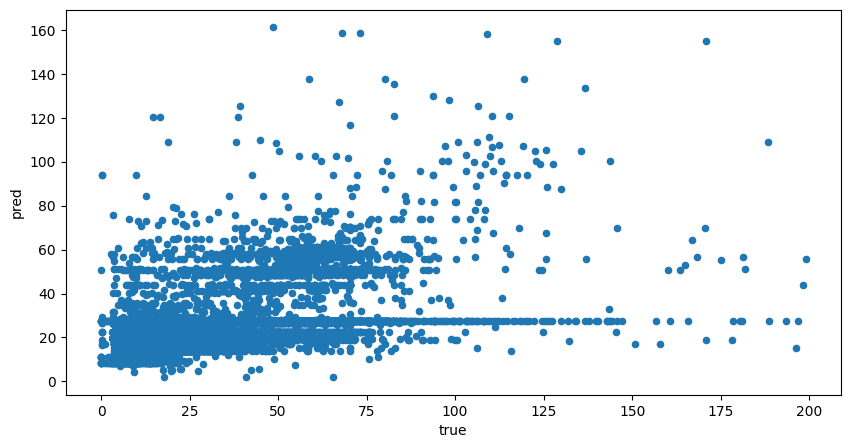

In [67]:
# Creating a DataFrame to compare the actual (true) and predicted (pred) values
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between actual and predicted values
# The figure size is set to 10x5, with 'true' values on the x-axis and 'pred' values on the y-axis
results.plot(figsize=(10,5), kind='scatter', x='true', y='pred')
plt.show()

# **9. Fixed Overfitting**

In [68]:
# Assigning the original training data (X_train, y_train) to new variables for overfitting analysis
X_train_overfit = X_train
y_train_overfit = y_train

# Assigning the original test data (X_test, y_test) to new variables for overfitting analysis
X_test_overfit = X_test
y_test_overfit = y_test


In [69]:
# Initializing a dictionary to store RMSE scores for different max_depth values
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

# Looping over a list of max_depth values to evaluate overfitting
for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)  # Printing the current max_depth value

    # Initializing and training a Decision Tree Regressor with the current max_depth
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)

    # Storing the trained model for further use
    model_at_hand_overfit = decision_tree_overfit

    # Predicting on the training set and calculating RMSE for training data
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))

    # Predicting on the test set and calculating RMSE for testing data
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))

    # Storing the max_depth and corresponding RMSE scores for training data
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)


2
5
8
10
15
20
30
50
70
100
150


In [70]:
# Converting the 'rmse_scores' dictionary into a pandas DataFrame for easier analysis and visualization
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.497250e+01,15.171077
1,5,1.418219e+01,14.394303
2,8,1.358801e+01,14.045113
3,10,1.318832e+01,13.961479
4,15,1.214784e+01,14.175700
5,20,1.120739e+01,14.509912
6,30,9.758938e+00,14.891988
7,50,5.854327e+00,16.631662
8,70,2.089200e+00,17.340864
9,100,2.988775e-17,17.528870


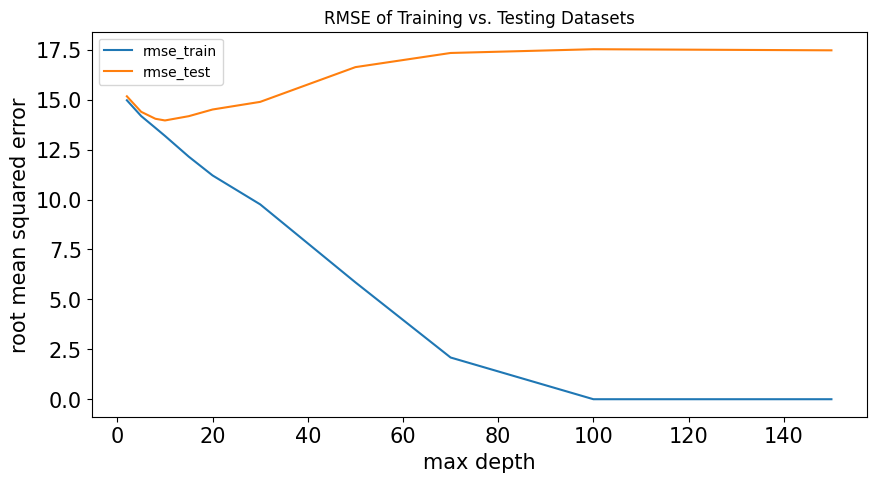

In [71]:
# Creating a plot from the 'rmse_scores' DataFrame to compare RMSE for training and testing datasets at different max_depth values
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5), title="RMSE of Training vs. Testing Datasets", fontsize=15, x='max_depth')

# Setting the x-axis label to "max depth" with a font size of 15
ax.set_xlabel("max depth", fontsize=15)

# Setting the y-axis label to "root mean squared error" with a font size of 15
ax.set_ylabel("root mean squared error", fontsize=15)
plt.show()


## **9.1. Random Forest**

In [72]:
# Importing the RandomForestRegressor from scikit-learn for regression tasks
from sklearn.ensemble import RandomForestRegressor

# Initializing a Random Forest Regressor model with default parameters
rando_model = RandomForestRegressor()

# Fitting the Random Forest model to the training data (X_train, y_train)
rando_model.fit(X_train, y_train)


RandomForestRegressor()

In [73]:
# Assigning the trained Random Forest model to 'model_at_hand' for evaluation
model_at_hand = rando_model

# Predicting the target values for the test set (X_test) using the trained model
y_pred = model_at_hand.predict(X_test)

# Importing evaluation metrics from scikit-learn to assess the model's performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Calculating and printing the Mean Absolute Error (MAE)
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))

# Calculating and printing the Mean Squared Error (MSE)
print('mean_squared_error', mean_squared_error(y_test, y_pred))

# Calculating and printing the Root Mean Squared Error (RMSE)
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))

# Calculating and printing the R-squared (R²) score to evaluate the model's goodness of fit
print('r2', r2_score(y_test, y_pred))


mean_absolute_error 7.446957900001599
mean_squared_error 179.53031727302505
root_mean_squared_error 13.398892389784502
r2 0.3604880279511903


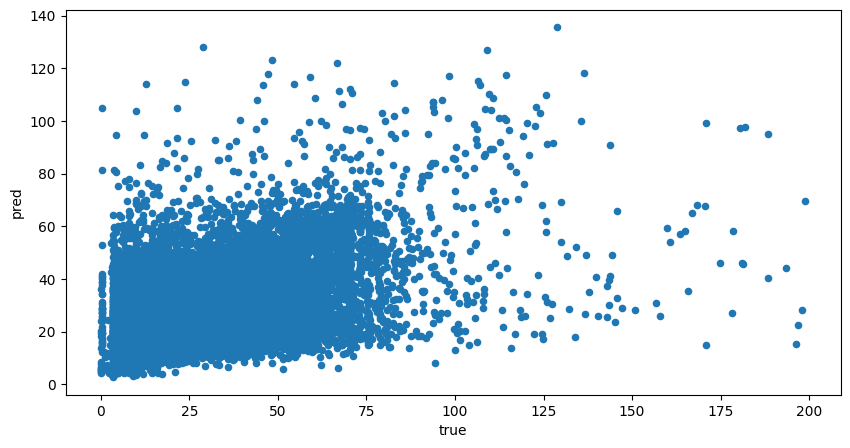

In [74]:
# Creating a DataFrame to compare the actual (true) and predicted (pred) values
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between actual and predicted values
# The figure size is set to 10x5, with 'true' values on the x-axis and 'pred' values on the y-axis
results.plot(figsize=(10,5), kind='scatter', x='true', y='pred')
plt.show()

## **9.2. Gradient Boosting**

In [75]:
# Importing the GradientBoostingRegressor from scikit-learn for regression tasks
from sklearn.ensemble import GradientBoostingRegressor

# Initializing a Gradient Boosting Regressor model with default parameters
gradBooster = GradientBoostingRegressor()

# Fitting the Gradient Boosting model to the training data (X_train, y_train)
gradBooster.fit(X_train, y_train)


GradientBoostingRegressor()

In [76]:
# Assigning the trained Gradient Boosting model to 'model_at_hand' for evaluation
model_at_hand = gradBooster

# Predicting the target values for the test set (X_test) using the trained model
y_pred = model_at_hand.predict(X_test)

# Importing evaluation metrics from scikit-learn to assess the model's performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Calculating and printing the Mean Absolute Error (MAE)
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))

# Calculating and printing the Mean Squared Error (MSE)
print('mean_squared_error', mean_squared_error(y_test, y_pred))

# Calculating and printing the Root Mean Squared Error (RMSE)
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))

# Calculating and printing the R-squared (R²) score to evaluate the model's goodness of fit
print('r2', r2_score(y_test, y_pred))


mean_absolute_error 8.299114729739044
mean_squared_error 177.01175554897196
root_mean_squared_error 13.304576488899297
r2 0.3694594952740402


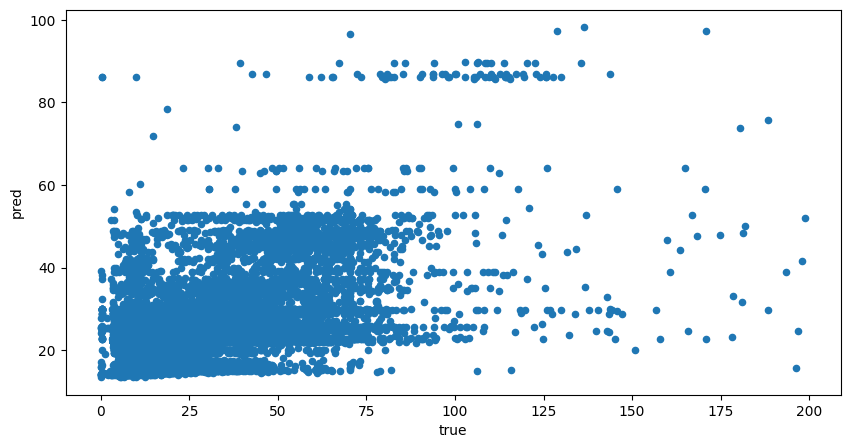

In [77]:
# Creating a DataFrame to compare the actual (true) and predicted (pred) values
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between actual and predicted values
# The figure size is set to 10x5, with 'true' values on the x-axis and 'pred' values on the y-axis
results.plot(figsize=(10,5), kind='scatter', x='true', y='pred')
plt.show()

<Axes: >

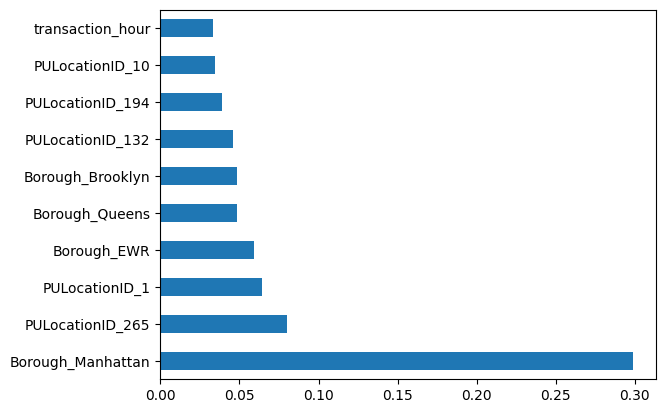

In [78]:
# Creating a Series to display the top 10 most important features from the model
# 'model_at_hand.feature_importances_' provides the importance scores for each feature
# Sorting the top 10 features and plotting them as a horizontal bar chart
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))


# **10. Fine-Tuning**

In [79]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [80]:
import pprint as pp

# Creating a dictionary called 'random_grid' that defines hyperparameter options for the model
random_grid = {'n_estimators': n_estimators,  # Number of trees in the forest
               'max_features': max_features,  # Maximum number of features to consider at each split
               'max_depth': max_depth,  # Maximum depth of each tree
               'min_samples_split': min_samples_split,  # Minimum number of samples required to split an internal node
               'min_samples_leaf': min_samples_leaf,  # Minimum number of samples required to be a leaf node
               'bootstrap': bootstrap}  # Whether to use bootstrap samples when building trees

# Pretty printing the 'random_grid' dictionary to display the hyperparameter grid in a readable format
pp.pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [81]:
from sklearn.model_selection import RandomizedSearchCV

# Initializing a RandomForestRegressor model
rf = RandomForestRegressor()

# Setting up a RandomizedSearchCV with the Random Forest model and the random hyperparameter grid
# n_iter=5 limits the number of random combinations to test, and cv=3 specifies 3-fold cross-validation
# verbose=2 ensures detailed output during the search, and n_jobs=-1 allows parallel processing
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=5, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fitting the RandomizedSearchCV model to the training data
rf_random.fit(X_train, y_train)

# Storing the cross-validation results in a DataFrame for further analysis
performances = pd.DataFrame.from_dict(rf_random.cv_results_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

In [82]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,90.178353,3.027200,6.054862,0.543541,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.424095,0.389657,0.411995,0.408582,0.014265,1
1,27.229085,1.196711,1.484527,0.283505,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.376531,0.355273,0.370989,0.367598,0.009004,2
2,30.174719,4.823736,1.499053,0.584668,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.376386,0.354454,0.371723,0.367521,0.009434,3
3,0.069773,0.020659,0.000000,0.000000,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,4
4,0.042502,0.001479,0.000000,0.000000,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,4


In [83]:
import time

# Recording the start time to measure the duration of model training
t0 = time.time()

# Initializing a RandomForestRegressor model with manually set hyperparameters
best = RandomForestRegressor(n_estimators=1800,  # Number of trees in the forest
                             min_samples_split=2,  # Minimum number of samples required to split a node
                             min_samples_leaf=4,  # Minimum number of samples required to be a leaf node
                             max_features='sqrt',  # Number of features to consider for the best split
                             max_depth=300,  # Maximum depth of the tree
                             bootstrap=True)  # Whether bootstrap samples are used

# Fitting the Random Forest model to the training data
best.fit(X_train, y_train)

# Recording the elapsed time for model training
t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")  # Printing the total time taken for training

# Assigning the trained model to 'model_at_hand' for further evaluation
model_at_hand = best

# Predicting the target values for the test set using the trained model
y_pred = model_at_hand.predict(X_test)

# Importing evaluation metrics from scikit-learn to assess the model's performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Calculating and printing the Mean Absolute Error (MAE)
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))

# Calculating and printing the Mean Squared Error (MSE)
print('mean_squared_error', mean_squared_error(y_test, y_pred))

# Calculating and printing the Root Mean Squared Error (RMSE)
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))

# Calculating and printing the R-squared (R²) score to evaluate the model's goodness of fit
print('r2', r2_score(y_test, y_pred))


Time elapsed:  456.0485637187958  seconds
mean_absolute_error 7.230304499072233
mean_squared_error 157.7792648900597
root_mean_squared_error 12.561021649931972
r2 0.4379683032320114


In [84]:
import time

# Recording the start time to measure the duration of model training
t0 = time.time()

# Initializing a RandomForestRegressor model with a second set of manually tuned hyperparameters
second_best = RandomForestRegressor(n_estimators=200,  # Number of trees in the forest (200)
                                    min_samples_split=10,  # Minimum number of samples required to split a node
                                    min_samples_leaf=2,  # Minimum number of samples required to be a leaf node
                                    max_features='sqrt',  # Number of features to consider for the best split
                                    max_depth=150,  # Maximum depth of the tree
                                    bootstrap=True)  # Whether bootstrap samples are used

# Fitting the Random Forest model to the training data
second_best.fit(X_train, y_train)

# Recording the elapsed time for model training
t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")  # Printing the total time taken for training

# Assigning the trained model to 'model_at_hand' for further evaluation
model_at_hand = second_best

# Predicting the target values for the test set using the trained model
y_pred = model_at_hand.predict(X_test)

# Importing evaluation metrics from scikit-learn to assess the model's performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Calculating and printing the Mean Absolute Error (MAE)
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))

# Calculating and printing the Mean Squared Error (MSE)
print('mean_squared_error', mean_squared_error(y_test, y_pred))

# Calculating and printing the Root Mean Squared Error (RMSE)
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))

# Calculating and printing the R-squared (R²) score to evaluate the model's goodness of fit
print('r2', r2_score(y_test, y_pred))


Time elapsed:  55.27442908287048  seconds
mean_absolute_error 7.166766678935564
mean_squared_error 157.3669957672744
root_mean_squared_error 12.544600263351336
r2 0.4394368632152609


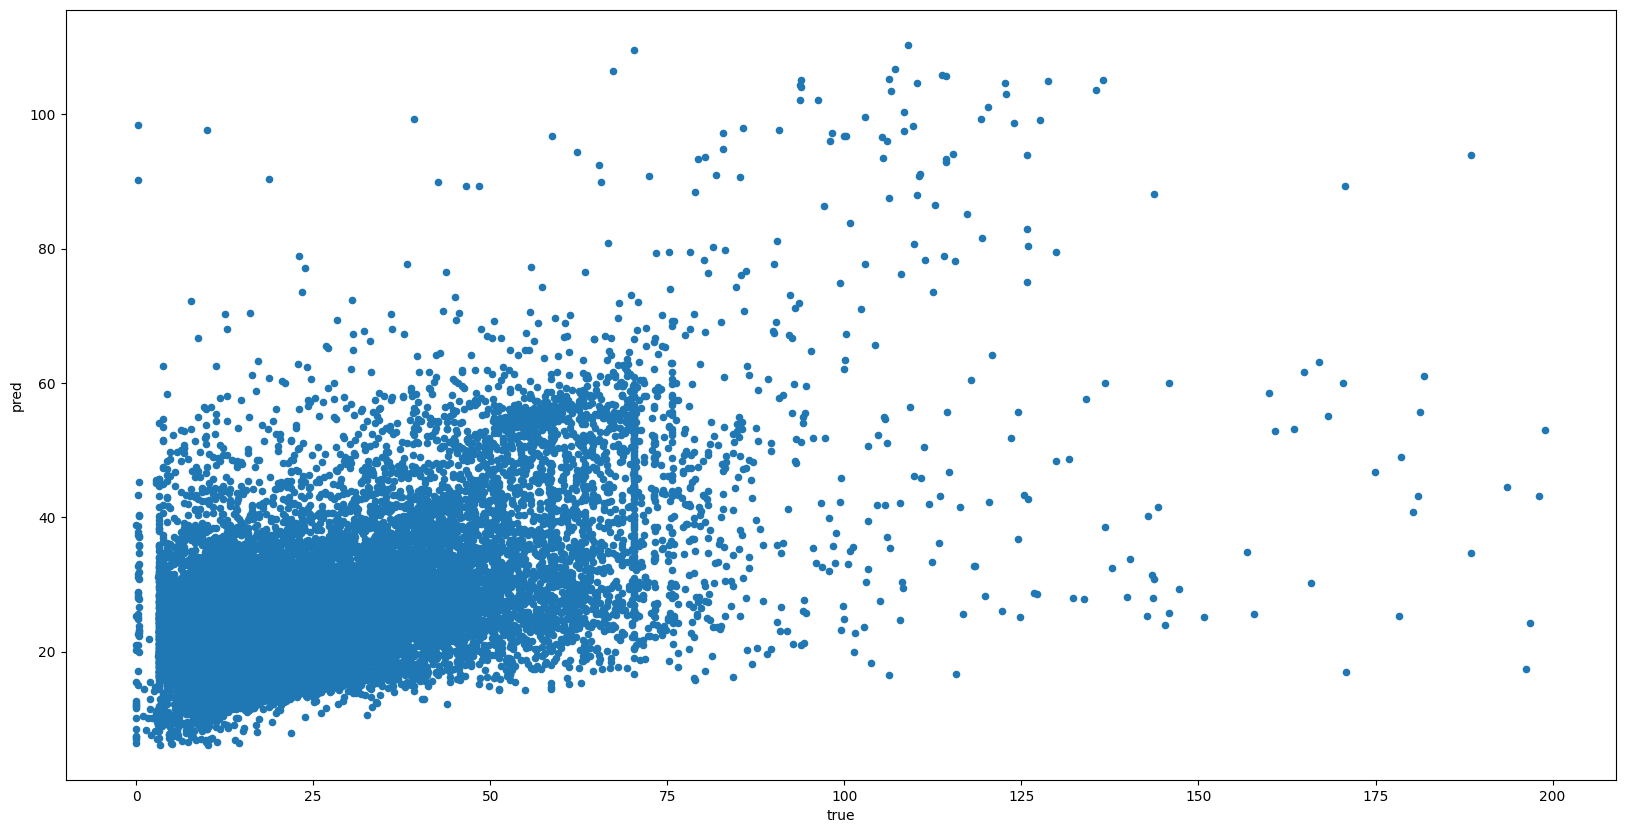

In [86]:
# Creating a DataFrame to compare the actual (true) and predicted (pred) values
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

# Plotting a scatter plot to visualize the relationship between actual and predicted values
# The figure size is set to 20x10, with 'true' values on the x-axis and 'pred' values on the y-axis
results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')
plt.show()